# Control Variates for Variance Reduction in Simulation

Monte Carlo simulation is a powerful tool for estimating quantities in stochastic models. However, high variance in estimates can require large numbers of simulations to achieve accurate results, making it computationally expensive, especially for complex models like the **rough model family** used in finance.

This lesson covers:
1. **Introduction to Control Variates**.
2. **Variance Reduction Principle**.
3. **Application: European Option Pricing under Arithmetic Brownian Motion (ABM)**.
4. **Challenges in Simulating Complex Models**.
5. **Approximation Techniques: Neural Networks**.

---



## Control Variates for Variance Reduction

The control variates technique improves simulation accuracy by introducing an auxiliary variable, $X$, that is correlated with the quantity of interest, $Y$, and has a **known expectation** $\mathbb{E}[X]$.

### Adjusted Estimate
Using the control variate, the adjusted estimator for $Y$ is:
$$
Y_{CV} = Y - c (X - \mathbb{E}[X]),
$$

$$
\mathbb{E}[Y_{CV}] = \mathbb{E}[Y] - c (\mathbb{E}[X] - \mathbb{E}[X]) = \mathbb{E}[Y]
$$

where $c$ is chosen to minimize the variance of the estimator:
$$
c = \frac{\text{Cov}(Y, X)}{\text{Var}(X)}.
$$

This adjustment reduces the variance of the estimator:
$$
\text{Var}(Y_{CV}) = \text{Var}(Y) - c^2 \text{Var}(X).
$$

The key idea is that by leveraging the correlation between $Y$ and $X$, and using the known expectation $\mathbb{E}[X]$, we can improve the precision of the estimate for $Y$.

---


## Example: European Option Pricing under ABM

We consider a European call option, where the payoff at maturity $T$ is:
$$
C = \max(S_T - K, 0),
$$
with:
- $S_t$: Underlying asset price at time $t$.
- $K$: Strike price.
- $T$: Time to maturity.

The **Arithmetic Brownian Motion (ABM)** dynamics for $S_t$ are:
$$
S_t = S_0 + \mu t + \sigma W_t,
$$
where:
- $S_0$: Initial price.
- $\mu$: Drift.
- $\sigma$: Volatility.
- $W_t$: Standard Brownian motion.

### Control Variate
A related auxiliary variable, $X$, can be the **arithmetic average** of simulated prices:
$$
X = \frac{1}{N} \sum_{i=1}^N S_{t_i}.
$$

The known expectation of $X$ under ABM is:
$$
\mathbb{E}[X] = S_0 + \mu T / 2.
$$

We use $X$ as the control variate to reduce variance in estimating $\mathbb{E}[C]$.

---


0.04800806884680072 0.023829478253818873
Original Call Price Estimate: 25.22
Standard Error (Original): 0.05
Adjusted Call Price Estimate (Control Variate): 25.23
Standard Error (Adjusted): 0.02
Variance Reduction: 75.36%


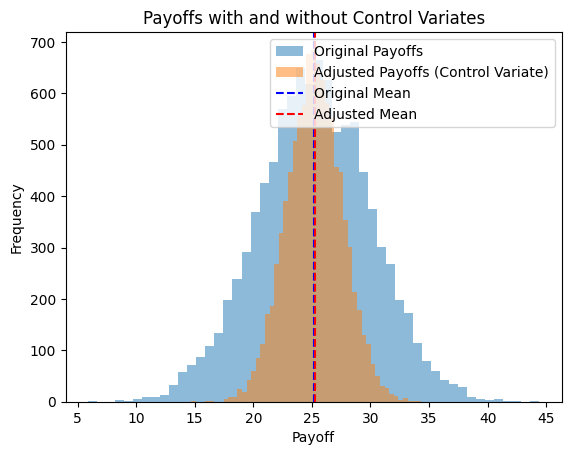

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100         # Initial price
K = 100           # Strike price (set below S0 for more meaningful payoffs)
T = 252            # Time to maturity
mu = .1        # Drift
sigma = 0.3      # Volatility
n_simulations = 10000  # Number of simulations
n_steps = 252    # Time steps for ABM

# Simulating ABM paths
dt = T / n_steps
time_grid = np.linspace(0, T, n_steps)
brownian_increments = np.random.normal(0, np.sqrt(dt), size=(n_simulations, n_steps))
S_paths = S0 + mu * time_grid + sigma * np.cumsum(brownian_increments, axis=1)

# Final prices
S_T = S_paths[:, -1]

# European Call Payoff
payoffs = np.maximum(S_T - K, 0)

# Control Variate: Arithmetic Average
S_avg = S_paths.mean(axis=1)
expected_S_avg = S0 + mu * T / 2

# Covariance and optimal c
covariance = np.cov(payoffs, S_avg)[0, 1]
variance_x = np.var(S_avg)
c_optimal = covariance / variance_x

# Adjusted payoffs using control variates
adjusted_payoffs = payoffs - c_optimal * (S_avg - expected_S_avg)

# Monte Carlo estimates
call_price = np.mean(payoffs)
adjusted_call_price = np.mean(adjusted_payoffs)

# Variance comparison
variance_original = np.var(payoffs)
variance_adjusted = np.var(adjusted_payoffs)

# Confidence interval computation
confidence_level = 0.95
z = norm.ppf(0.5 + confidence_level / 2)

# Standard errors
se_original = np.std(payoffs) / np.sqrt(n_simulations)
se_adjusted = np.std(adjusted_payoffs) / np.sqrt(n_simulations)

print(se_original, se_adjusted)

# Confidence intervals
ci_original = (call_price - z * se_original, call_price + z * se_original)
ci_adjusted = (adjusted_call_price - z * se_adjusted, adjusted_call_price + z * se_adjusted)

# Results
print(f"Original Call Price Estimate: {call_price:.2f}")
print("Standard Error (Original):", np.round(se_original, 2))
print(f"Adjusted Call Price Estimate (Control Variate): {adjusted_call_price:.2f}")
print("Standard Error (Adjusted):", np.round(se_adjusted, 2))
print(f"Variance Reduction: {100 * (1 - variance_adjusted / variance_original):.2f}%")

# Plot histogram
plt.hist(payoffs, bins=50, alpha=0.5, label="Original Payoffs")
plt.hist(adjusted_payoffs, bins=50, alpha=0.5, label="Adjusted Payoffs (Control Variate)")
plt.axvline(call_price, color='blue', linestyle='--', label="Original Mean")
plt.axvline(adjusted_call_price, color='red', linestyle='--', label="Adjusted Mean")
plt.title("Payoffs with and without Control Variates")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Challenges with Complex Models

### Rough Models in Finance
Simulation becomes computationally expensive for models like **rough volatility models** (e.g., the rough Bergomi model), where the roughness of the volatility process introduces intricate dependencies over time.

### Approximations with Neural Networks
An active area of research focuses on using neural networks for:
1. **Fast approximation of payoff functions**.
2. **Reducing computational costs** by replacing costly simulations with learned surrogate models.

For instance:
- Neural networks can learn mappings from model parameters to option prices.
- Pre-trained models enable rapid computation without requiring full simulations.

---


# Conclusion

Control variates are an effective variance reduction tool in simulations. By leveraging auxiliary variables with known expectations, we improve estimation accuracy with fewer simulations.

In complex settings, like rough models, computational challenges necessitate innovative techniques like neural networks, which approximate functions and streamline simulations.

---
